# Datenanalyse Kompensiert und Nicht Kompensiert

## DeepMotion Nicht Kompensiert

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.interpolate import interp1d
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
# Read the data to a pandas data frame
df_deepM_03 = pd.read_csv('../Data/KeypointsBereinigtNichtKompensiert.csv', sep=',', encoding='utf-8')
df_deepM_03.head(5)

,compensation,frame,path,x_0,x_1,x_2,x_3,x_4,x_5,x_6,...,z_23,z_24,z_25,z_26,z_27,z_28,z_29,z_30,z_31,z_32
0,0,1,/Users/salomekoller/Library/CloudStorage/OneDr...,0.0000,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,...,7.371407,7.371387,9.394707,9.399187,-6.115406,-6.115967,-5.740273,-5.740273,47.437397,47.436827
1,0,2,/Users/salomekoller/Library/CloudStorage/OneDr...,-3.3216,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,...,-2.696713,-3.498616,-29.445363,-13.956810,-63.243623,-64.332943,-5.740273,-5.740273,-14.759285,-16.102833
2,0,3,/Users/salomekoller/Library/CloudStorage/OneDr...,1.6550,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,...,-8.997166,-10.653107,-45.717673,-27.773403,-97.982793,-99.005583,-5.740273,-5.740273,-52.912333,-53.810943
3,0,4,/Users/salomekoller/Library/CloudStorage/OneDr...,3.9860,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,...,-10.049377,-11.663836,-44.307243,-28.706163,-97.977963,-98.740323,-5.740273,-5.740273,-52.726213,-53.393883
4,0,5,/Users/salomekoller/Library/CloudStorage/OneDr...,5.4320,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,...,-10.798463,-12.359276,-44.008033,-29.568633,-98.200573,-98.692723,-5.740273,-5.740273,-52.941793,-53.249863


### Analysis

In [3]:
# Dimension (rows, columns)
print('Dimension:', df_deepM_03.shape)

# Number of rows
print('Number of rows:', df_deepM_03.shape[0])

# Number of columns
print('Number of columns:', df_deepM_03.shape[1])

Dimension: (2495, 102)
Number of rows: 2495
Number of columns: 102


### Splitting Frames

In [4]:
# Initialize variables
frame_count = 0
frames_until_reset = []

# Iterate over the rows of the DataFrame
for index, row in df_deepM_03.iterrows():
    # Increment frame count
    frame_count += 1
    
    # Check if the "frame" value changes from a non-1 value to 1
    if row["frame"] == 1 and frame_count > 1:
        # Add frame count to the list
        frames_until_reset.append(frame_count -1)


# If the last frame is not 1, add the remaining frame count to the list
if frame_count > 0:
    frames_until_reset.append(frame_count)

# Print the number of frames until reset for each cycle
print("Number of frames until reset for each cycle:", frames_until_reset)

Number of frames until reset for each cycle: [200, 405, 610, 816, 1023, 1228, 1434, 1558, 1740, 1931, 2123, 2298, 2495]


In [5]:
# Split DataFrame into segments based on frame changes
dfs = []
start = 0
for end in frames_until_reset:
    dfs.append(df_deepM_03.iloc[start:end])
    start = end

# Print the number of splits and the resulting DataFrames
print("Number of splits:", len(dfs))
for i, df in enumerate(dfs):
    print(f"DataFrame {i+1}")
df.head(5)

Number of splits: 13
DataFrame 1
DataFrame 2
DataFrame 3
DataFrame 4
DataFrame 5
DataFrame 6
DataFrame 7
DataFrame 8
DataFrame 9
DataFrame 10
DataFrame 11
DataFrame 12
DataFrame 13


,compensation,frame,path,x_0,x_1,x_2,x_3,x_4,x_5,x_6,...,z_23,z_24,z_25,z_26,z_27,z_28,z_29,z_30,z_31,z_32
2298,0,1,/Users/salomekoller/Library/CloudStorage/OneDr...,140.9552,-993.7168,-993.7168,-993.7168,-993.7168,-993.7168,-993.7168,...,-387.21738,-388.35668,-425.33048,-397.88118,-463.57788,-462.95338,-60.97508,-60.97508,-416.97018,-415.90208
2299,0,2,/Users/salomekoller/Library/CloudStorage/OneDr...,141.3582,-993.7168,-993.7168,-993.7168,-993.7168,-993.7168,-993.7168,...,-386.72078,-387.96628,-425.08968,-397.69088,-463.59388,-464.93028,-60.97508,-60.97508,-417.02138,-418.35738
2300,0,3,/Users/salomekoller/Library/CloudStorage/OneDr...,142.3012,-993.7168,-993.7168,-993.7168,-993.7168,-993.7168,-993.7168,...,-386.33908,-387.65408,-425.06258,-396.13818,-463.92248,-464.40878,-60.97508,-60.97508,-417.38498,-417.66948
2301,0,4,/Users/salomekoller/Library/CloudStorage/OneDr...,142.6282,-993.7168,-993.7168,-993.7168,-993.7168,-993.7168,-993.7168,...,-385.77808,-387.09308,-424.74468,-395.38578,-463.84858,-465.17548,-60.97508,-60.97508,-417.36458,-418.79078
2302,0,5,/Users/salomekoller/Library/CloudStorage/OneDr...,143.1142,-993.7168,-993.7168,-993.7168,-993.7168,-993.7168,-993.7168,...,-385.16978,-386.50828,-424.44938,-394.93598,-463.86758,-466.03168,-60.97508,-60.97508,-417.44118,-419.85618


### Rechte Handbewegung Nicht Kompensiert

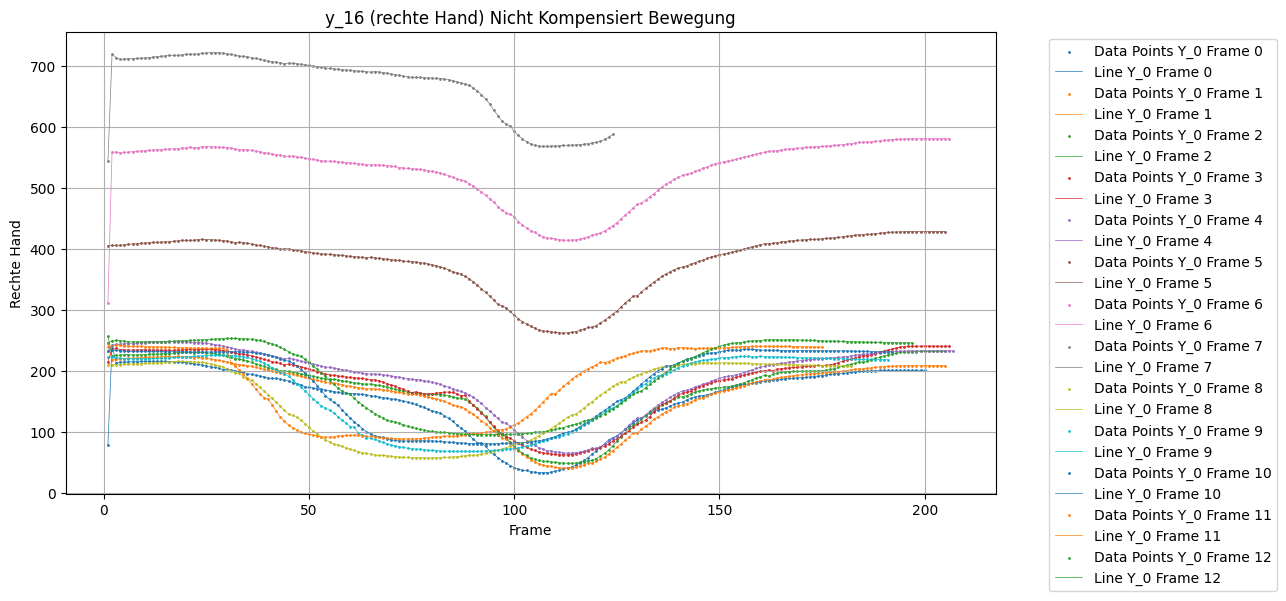

In [6]:
# Set the size of the figure
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Plot each DataFrame in dfs
for i, df in enumerate(dfs):

    # Plot the values of "y_0" against "frame" as dots
    plt.scatter(df["frame"], df["y_16"], marker='o', color=f'C{i}', label=f'Data Points Y_0 Frame {i}', s=1)
    # Plot the line connecting the data points
    plt.plot(df["frame"], df["y_16"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Line Y_0 Frame {i}')


plt.title("y_16 (rechte Hand) Nicht Kompensiert Bewegung")
plt.xlabel("Frame")
plt.ylabel("Rechte Hand")
plt.grid(True)
# Move the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Linke Handbewegung Nicht Kompensiert

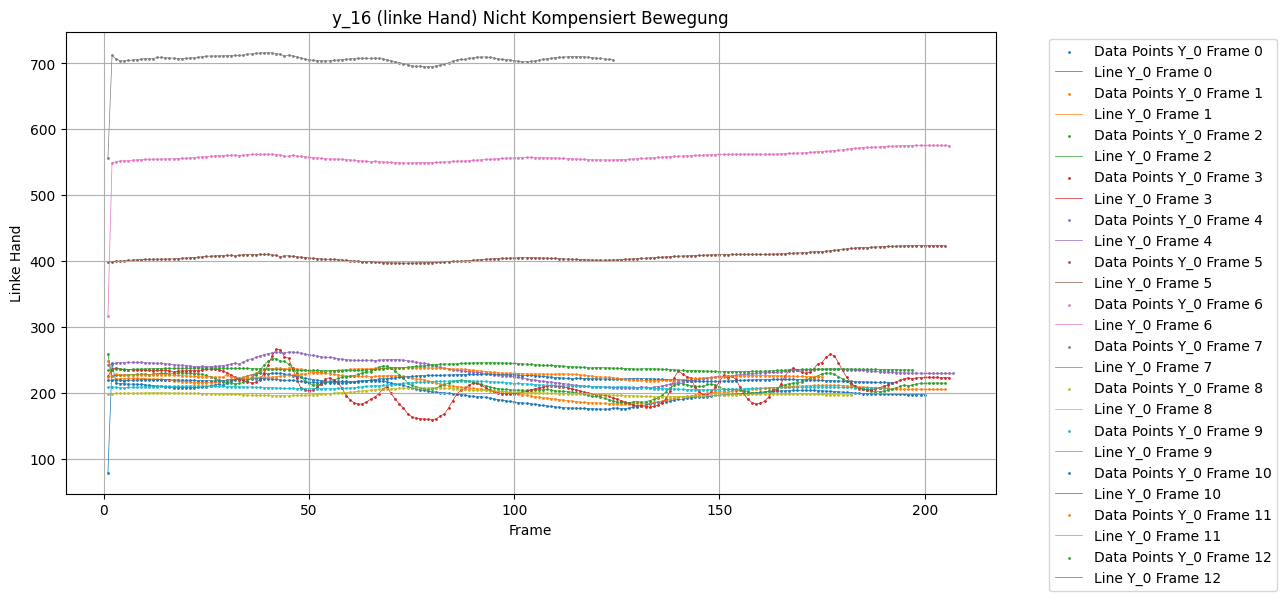

In [7]:
# Set the size of the figure
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Plot each DataFrame in dfs
for i, df in enumerate(dfs):

    # Plot the values of "y_0" against "frame" as dots
    plt.scatter(df["frame"], df["y_15"], marker='o', color=f'C{i}', label=f'Data Points Y_0 Frame {i}', s=1)
    # Plot the line connecting the data points
    plt.plot(df["frame"], df["y_15"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Line Y_0 Frame {i}')


plt.title("y_16 (linke Hand) Nicht Kompensiert Bewegung")
plt.xlabel("Frame")
plt.ylabel("Linke Hand")
plt.grid(True)
# Move the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Linker Ellbogen Nicht Kompensiert

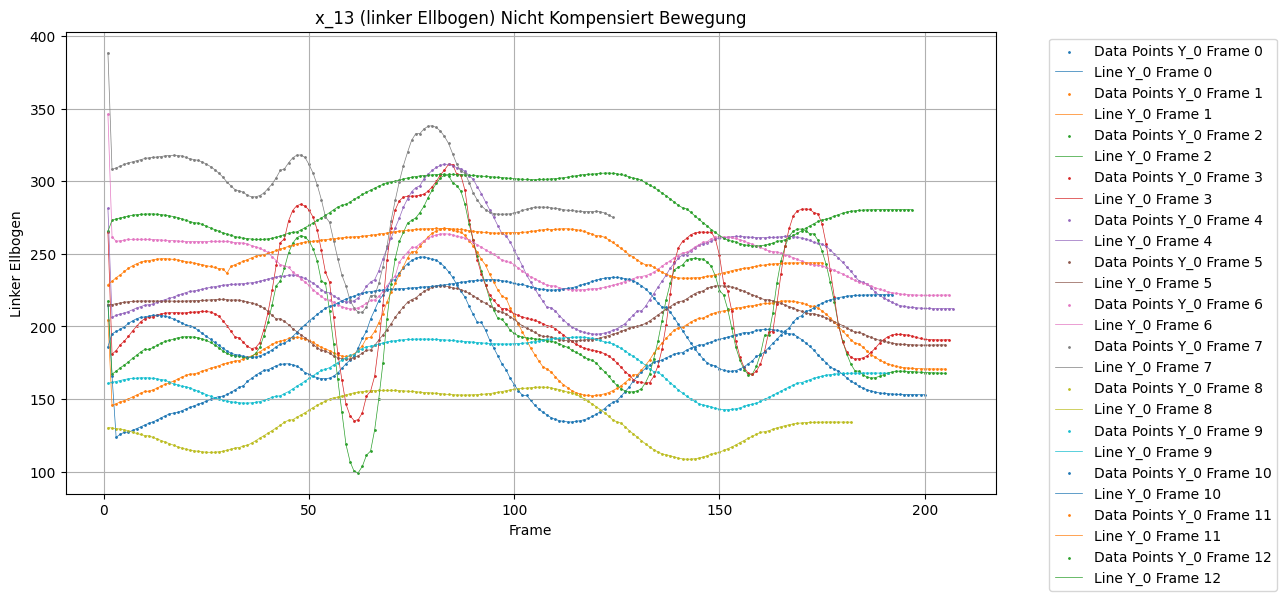

In [8]:
# Set the size of the figure
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Plot each DataFrame in dfs
for i, df in enumerate(dfs):

    # Plot the values of "y_0" against "frame" as dots
    plt.scatter(df["frame"], df["x_13"], marker='o', color=f'C{i}', label=f'Data Points Y_0 Frame {i}', s=1)
    # Plot the line connecting the data points
    plt.plot(df["frame"], df["x_13"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Line Y_0 Frame {i}')


plt.title("x_13 (linker Ellbogen) Nicht Kompensiert Bewegung")
plt.xlabel("Frame")
plt.ylabel("Linker Ellbogen")
plt.grid(True)
# Move the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Berechnung des Mean

In [9]:
# Calculate the mean for the specified columns in each DataFrame in dfs
means03 = []

mean_values_03 = df_deepM_03[['frame', 'x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1', 'x_2', 'y_2', 'z_2', 'x_3', 'y_3', 'z_3',
                   'x_4', 'y_4', 'z_4', 'x_5', 'y_5', 'z_5', 'x_6', 'y_6', 'z_6', 'x_7', 'y_7', 'z_7',
                   'x_8', 'y_8', 'z_8', 'x_9', 'y_9', 'z_9', 'x_10', 'y_10', 'z_10', 'x_11', 'y_11', 'z_11',
                   'x_12', 'y_12', 'z_12', 'x_13', 'y_13', 'z_13', 'x_14', 'y_14', 'z_14', 'x_15', 'y_15', 'z_15',
                   'x_16', 'y_16', 'z_16', 'x_17', 'y_17', 'z_17', 'x_18', 'y_18', 'z_18', 'x_19', 'y_19', 'z_19',
                   'x_20', 'y_20', 'z_20', 'x_21', 'y_21', 'z_21', 'x_22', 'y_22', 'z_22', 'x_23', 'y_23', 'z_23',
                   'x_24', 'y_24', 'z_24', 'x_25', 'y_25', 'z_25', 'x_26', 'y_26', 'z_26', 'x_27', 'y_27', 'z_27',
                   'x_28', 'y_28', 'z_28', 'x_29', 'y_29', 'z_29', 'x_30', 'y_30', 'z_30', 'x_31', 'y_31', 'z_31',
                   'x_32', 'y_32', 'z_32']].groupby('frame').mean()
means03.append(mean_values_03)
    
print(mean_values_03)

              x_0         y_0         z_0          x_1         y_1        z_1   
frame                                                                           
1       79.493292   72.779392 -228.744809  -998.361846 -304.775762 -26.984430  \
2       80.842746   99.829900 -211.074476  -998.361846 -304.775762 -26.984430   
3       82.510746  101.002331 -210.113453  -998.361846 -304.775762 -26.984430   
4       84.052592  100.255823 -211.267363  -998.361846 -304.775762 -26.984430   
5       85.027269   99.980685 -212.000914  -998.361846 -304.775762 -26.984430   
...           ...         ...         ...          ...         ...        ...   
203     86.286333  125.545300 -355.826606 -1001.265000 -299.977800  -5.740273   
204     86.285333  125.488133 -355.844773 -1001.265000 -299.977800  -5.740273   
205     86.292167  125.454317 -355.845706 -1001.265000 -299.977800  -5.740273   
206    107.860333  156.219600 -415.661006 -1001.265000 -299.977800  -5.740273   
207    107.928000   42.38570

### Mean rechte Hand

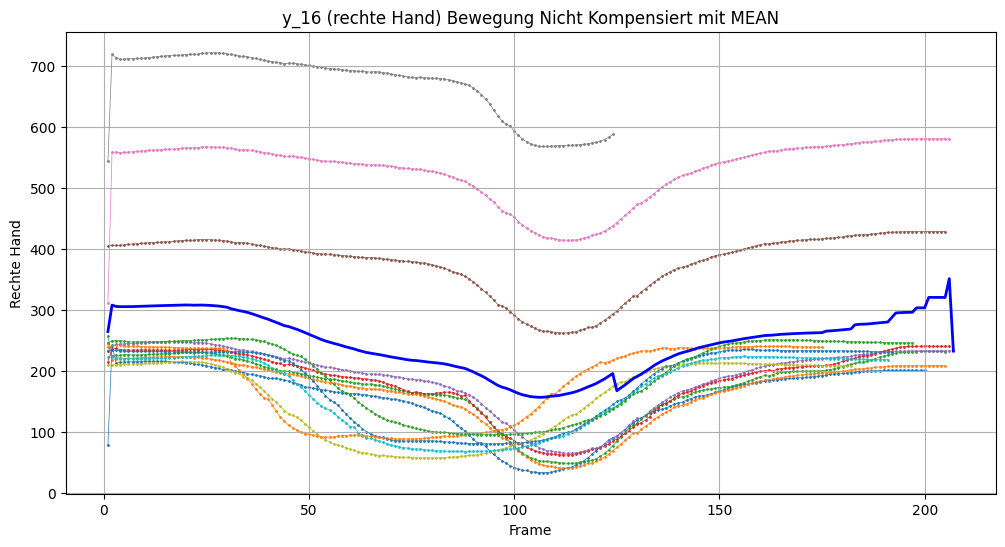

In [10]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

# Plot each DataFrame in dfs
for i, df in enumerate(dfs):

    # Plot the values of "y_0" against "frame" as dots
    plt.scatter(df["frame"], df["y_16"], marker='o', color=f'C{i}', label=f'Data Points Y_0 Frame {i}', s=1)
    # Plot the line connecting the data points
    plt.plot(df["frame"], df["y_16"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Line Y_0 Frame {i}')

# Plot the mean values per frame
plt.plot(mean_values_03.index, mean_values_03["y_16"], color='b', linestyle='-', linewidth=2, label='Mean Y_16')

plt.title("y_16 (rechte Hand) Bewegung Nicht Kompensiert mit MEAN")
plt.xlabel("Frame")
plt.ylabel("Rechte Hand")
plt.grid(True)

plt.show()


## DeepMotion Kompensiert

In [11]:
# Read the data to a pandas data frame
df_deepM01 = pd.read_csv('../Data/KeypointsBereinigtKompensiert.csv', sep=',', encoding='utf-8')
df_deepM01.head(5)

,compensation,frame,path,x_0,x_1,x_2,x_3,x_4,x_5,x_6,...,z_23,z_24,z_25,z_26,z_27,z_28,z_29,z_30,z_31,z_32
0,1,1,/Users/salomekoller/Library/CloudStorage/OneDr...,0.0000,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,...,7.371407,7.371387,9.394707,9.399187,-6.115406,-6.115967,-5.740273,-5.740273,47.437397,47.436827
1,1,2,/Users/salomekoller/Library/CloudStorage/OneDr...,-3.3216,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,...,-2.696713,-3.498616,-29.445363,-13.956810,-63.243623,-64.332943,-5.740273,-5.740273,-14.759285,-16.102833
2,1,3,/Users/salomekoller/Library/CloudStorage/OneDr...,1.6550,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,...,-8.997166,-10.653107,-45.717673,-27.773403,-97.982793,-99.005583,-5.740273,-5.740273,-52.912333,-53.810943
3,1,4,/Users/salomekoller/Library/CloudStorage/OneDr...,3.9860,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,...,-10.049377,-11.663836,-44.307243,-28.706163,-97.977963,-98.740323,-5.740273,-5.740273,-52.726213,-53.393883
4,1,5,/Users/salomekoller/Library/CloudStorage/OneDr...,5.4320,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,-1001.265,...,-10.798463,-12.359276,-44.008033,-29.568633,-98.200573,-98.692723,-5.740273,-5.740273,-52.941793,-53.249863


### Analysis

In [12]:
# Dimension (rows, columns)
print('Dimension:', df_deepM01.shape)

# Number of rows
print('Number of rows:', df_deepM01.shape[0])

# Number of columns
print('Number of columns:', df_deepM01.shape[1])


Dimension: (3273, 102)
Number of rows: 3273
Number of columns: 102


### Splitting Frames

In [13]:
# Initialize variables
frame_count = 0
frames_until_reset = []

# Iterate over the rows of the DataFrame
for index, row in df_deepM01.iterrows():
    # Increment frame count
    frame_count += 1
    
    # Check if the "frame" value changes from a non-1 value to 1
    if row["frame"] == 1 and frame_count > 1:
        # Add frame count to the list
        frames_until_reset.append(frame_count -1)


# If the last frame is not 1, add the remaining frame count to the list
if frame_count > 0:
    frames_until_reset.append(frame_count)

# Print the number of frames until reset for each cycle
print("Number of frames until reset for each cycle:", frames_until_reset)

Number of frames until reset for each cycle: [200, 405, 610, 816, 1023, 1228, 1434, 1558, 1895, 2234, 2577, 2924, 3273]


In [14]:
# Split DataFrame into segments based on frame changes
dfsKomp01 = []
start = 0
for end in frames_until_reset:
    dfsKomp01.append(df_deepM01.iloc[start:end])
    start = end

# Print the number of splits and the resulting DataFrames
print("Number of splits:", len(dfsKomp01))
for i, df in enumerate(dfsKomp01):
    print(f"DataFrame {i+1}")
df.head(5)

Number of splits: 13
DataFrame 1
DataFrame 2
DataFrame 3
DataFrame 4
DataFrame 5
DataFrame 6
DataFrame 7
DataFrame 8
DataFrame 9
DataFrame 10
DataFrame 11
DataFrame 12
DataFrame 13


,compensation,frame,path,x_0,x_1,x_2,x_3,x_4,x_5,x_6,...,z_23,z_24,z_25,z_26,z_27,z_28,z_29,z_30,z_31,z_32
2924,1,1,/Users/salomekoller/Library/CloudStorage/OneDr...,-411.2102,-1045.738,-1045.738,-1045.738,-1045.738,-1045.738,-1045.738,...,-298.73827,-312.50147,-298.90327,-323.99337,-357.39157,-369.95317,-53.49067,-53.49067,-309.34197,-321.85567
2925,1,2,/Users/salomekoller/Library/CloudStorage/OneDr...,-408.4988,-1045.738,-1045.738,-1045.738,-1045.738,-1045.738,-1045.738,...,-295.26937,-309.23537,-296.96007,-323.69677,-357.33237,-369.86277,-53.49067,-53.49067,-309.63317,-322.12737
2926,1,3,/Users/salomekoller/Library/CloudStorage/OneDr...,-407.0623,-1045.738,-1045.738,-1045.738,-1045.738,-1045.738,-1045.738,...,-293.35757,-307.43177,-295.83547,-323.43237,-357.41407,-369.81717,-53.49067,-53.49067,-309.94557,-322.31727
2927,1,4,/Users/salomekoller/Library/CloudStorage/OneDr...,-405.5894,-1045.738,-1045.738,-1045.738,-1045.738,-1045.738,-1045.738,...,-291.33507,-305.51867,-294.53297,-323.07777,-357.46657,-369.69257,-53.49067,-53.49067,-310.25887,-322.44317
2928,1,5,/Users/salomekoller/Library/CloudStorage/OneDr...,-402.5479,-1045.738,-1045.738,-1045.738,-1045.738,-1045.738,-1045.738,...,-286.97617,-301.39637,-291.58897,-322.14107,-357.76697,-369.49137,-53.49067,-53.49067,-311.17607,-322.75367


### Rechte Handbewegung Kompensiert

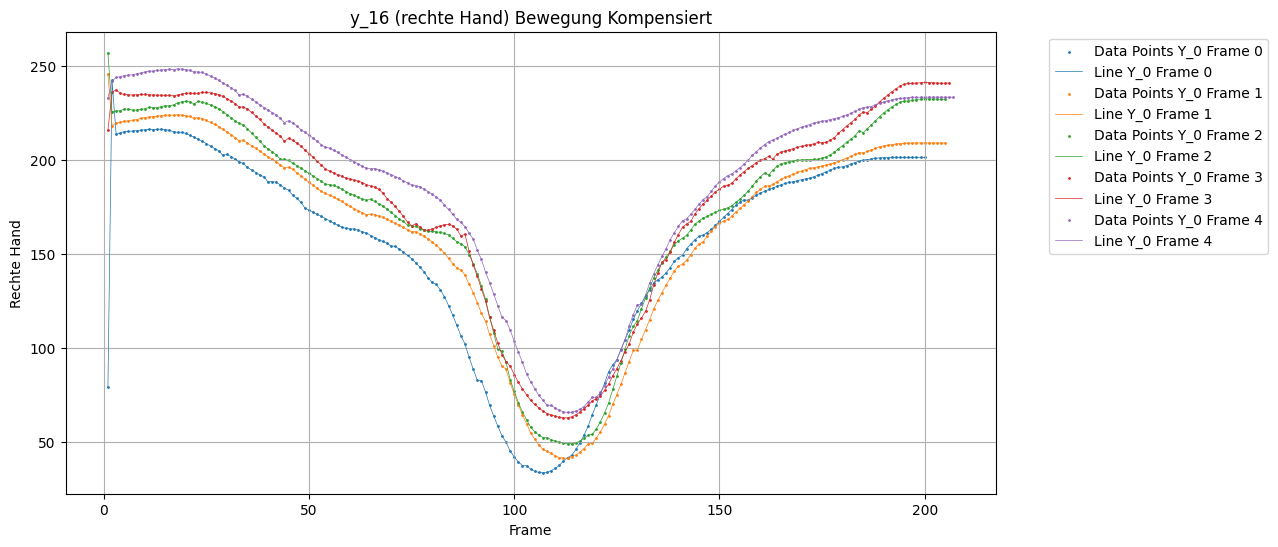

In [15]:
# Set the size of the figure
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Plot each DataFrame in dfs from index 0 to 4
for i, df in enumerate(dfsKomp01[:5]):
    plt.scatter(df["frame"], df["y_16"], marker='o', color=f'C{i}', label=f'Data Points Y_0 Frame {i}', s=1)
    plt.plot(df["frame"], df["y_16"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Line Y_0 Frame {i}')

plt.title("y_16 (rechte Hand) Bewegung Kompensiert")
plt.xlabel("Frame")
plt.ylabel("Rechte Hand")
plt.grid(True)

# Move the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


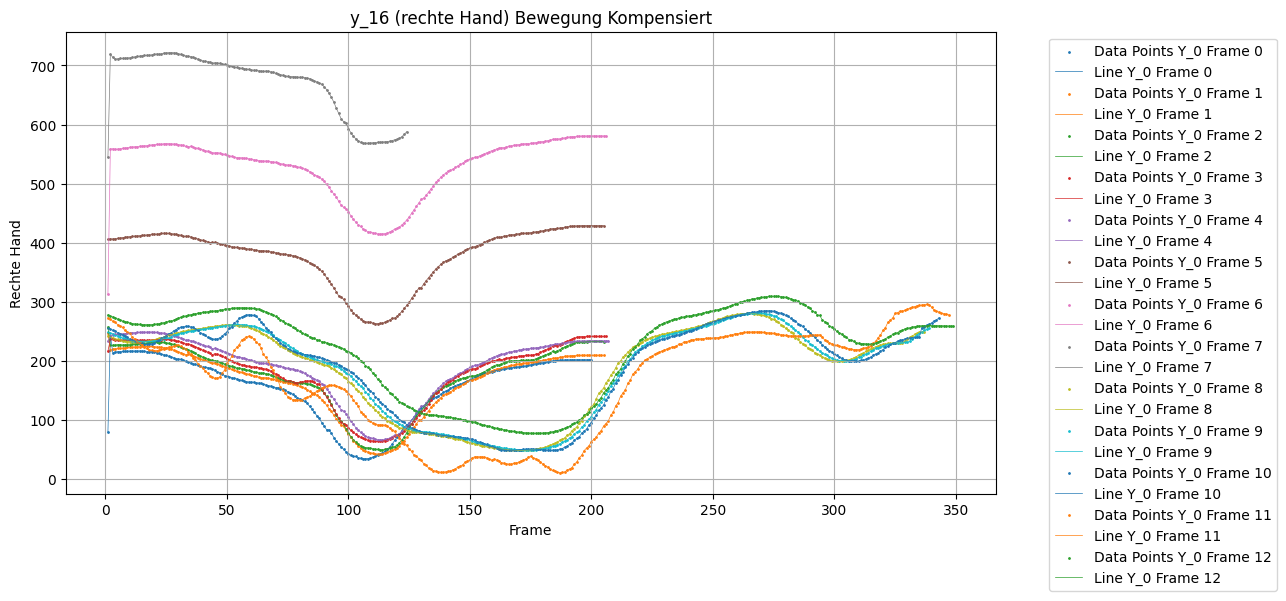

In [16]:
# Set the size of the figure
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Plot each DataFrame in dfs
for i, df in enumerate(dfsKomp01):
    plt.scatter(df["frame"], df["y_16"], marker='o', color=f'C{i}', label=f'Data Points Y_0 Frame {i}', s=1)
    plt.plot(df["frame"], df["y_16"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Line Y_0 Frame {i}')

plt.title("y_16 (rechte Hand) Bewegung Kompensiert")
plt.xlabel("Frame")
plt.ylabel("Rechte Hand")
plt.grid(True)
# Move the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


### Linke Handbewegung Kompensiert

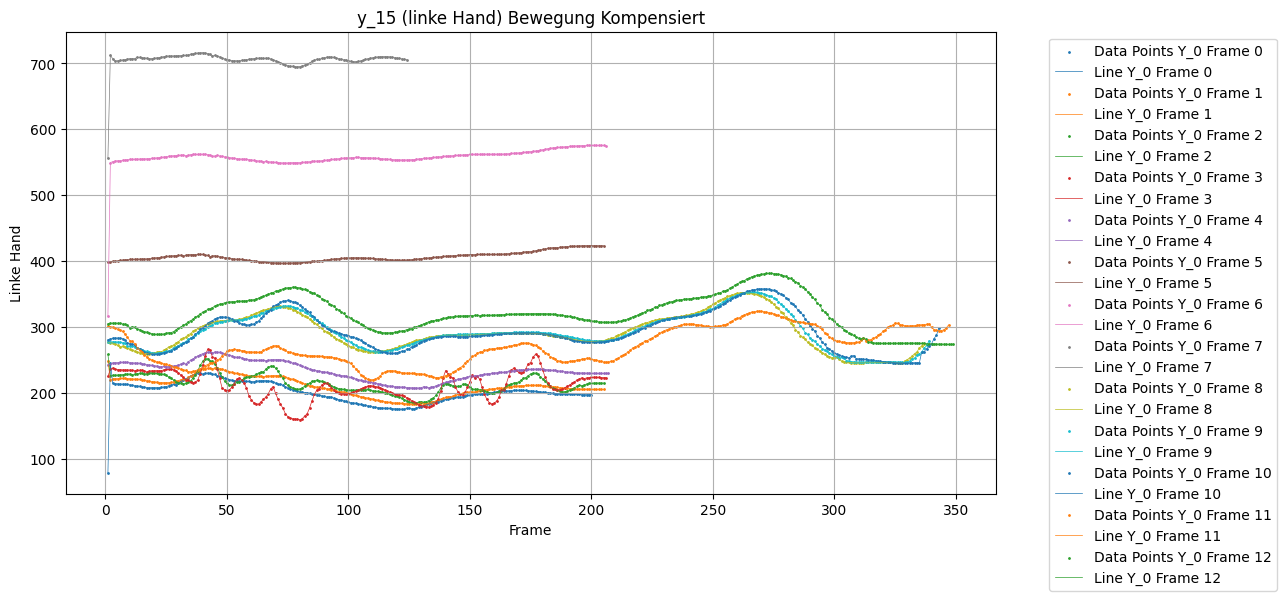

In [17]:
# Set the size of the figure
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Plot each DataFrame in dfs
for i, df in enumerate(dfsKomp01):
    plt.scatter(df["frame"], df["y_15"], marker='o', color=f'C{i}', label=f'Data Points Y_0 Frame {i}', s=1)
    plt.plot(df["frame"], df["y_15"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Line Y_0 Frame {i}')

plt.title("y_15 (linke Hand) Bewegung Kompensiert")
plt.xlabel("Frame")
plt.ylabel("Linke Hand")
plt.grid(True)
# Move the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


### Linker Ellbogen Kompensiert

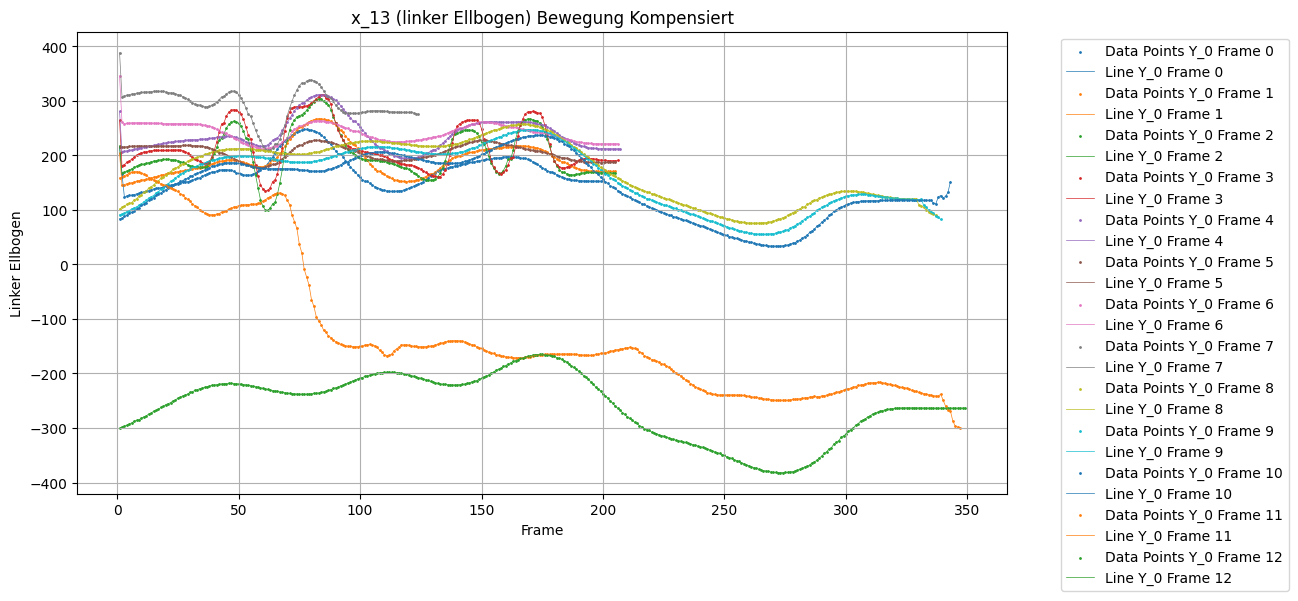

In [18]:
# Set the size of the figure
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Plot each DataFrame in dfs
for i, df in enumerate(dfsKomp01):
    plt.scatter(df["frame"], df["x_13"], marker='o', color=f'C{i}', label=f'Data Points Y_0 Frame {i}', s=1)
    plt.plot(df["frame"], df["x_13"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Line Y_0 Frame {i}')

plt.title("x_13 (linker Ellbogen) Bewegung Kompensiert")
plt.xlabel("Frame")
plt.ylabel("Linker Ellbogen")
plt.grid(True)
# Move the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


### Berechnung des Mean

In [19]:
# Calculate the mean for the specified columns in each DataFrame in dfs
means01 = []

mean_values_01 = df_deepM01[['frame', 'x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1', 'x_2', 'y_2', 'z_2', 'x_3', 'y_3', 'z_3',
                   'x_4', 'y_4', 'z_4', 'x_5', 'y_5', 'z_5', 'x_6', 'y_6', 'z_6', 'x_7', 'y_7', 'z_7',
                   'x_8', 'y_8', 'z_8', 'x_9', 'y_9', 'z_9', 'x_10', 'y_10', 'z_10', 'x_11', 'y_11', 'z_11',
                   'x_12', 'y_12', 'z_12', 'x_13', 'y_13', 'z_13', 'x_14', 'y_14', 'z_14', 'x_15', 'y_15', 'z_15',
                   'x_16', 'y_16', 'z_16', 'x_17', 'y_17', 'z_17', 'x_18', 'y_18', 'z_18', 'x_19', 'y_19', 'z_19',
                   'x_20', 'y_20', 'z_20', 'x_21', 'y_21', 'z_21', 'x_22', 'y_22', 'z_22', 'x_23', 'y_23', 'z_23',
                   'x_24', 'y_24', 'z_24', 'x_25', 'y_25', 'z_25', 'x_26', 'y_26', 'z_26', 'x_27', 'y_27', 'z_27',
                   'x_28', 'y_28', 'z_28', 'x_29', 'y_29', 'z_29', 'x_30', 'y_30', 'z_30', 'x_31', 'y_31', 'z_31',
                   'x_32', 'y_32', 'z_32']].groupby('frame').mean()
means01.append(mean_values_01)
    
print(mean_values_01)

              x_0        y_0         z_0       x_1         y_1       z_1   
frame                                                                      
1       23.146215  69.069492 -202.250882 -1018.370 -302.761877 -24.10581  \
2       25.201508  95.652638 -182.959528 -1018.370 -302.761877 -24.10581   
3       27.431054  96.784785 -180.365567 -1018.370 -302.761877 -24.10581   
4       29.857354  96.380038 -179.746803 -1018.370 -302.761877 -24.10581   
5       31.584008  96.531500 -178.454013 -1018.370 -302.761877 -24.10581   
...           ...        ...         ...       ...         ...       ...   
345   -400.842650  28.973850 -345.221770 -1045.738 -307.216400 -53.49067   
346   -400.953400  28.509750 -333.863770 -1045.738 -307.216400 -53.49067   
347   -400.222400  28.112950 -310.365620 -1045.738 -307.216400 -53.49067   
348   -389.251900  29.328800 -326.580570 -1045.738 -307.216400 -53.49067   
349   -389.238500  29.309500 -326.596370 -1045.738 -307.216400 -53.49067   

           

### Mean rechte Hand

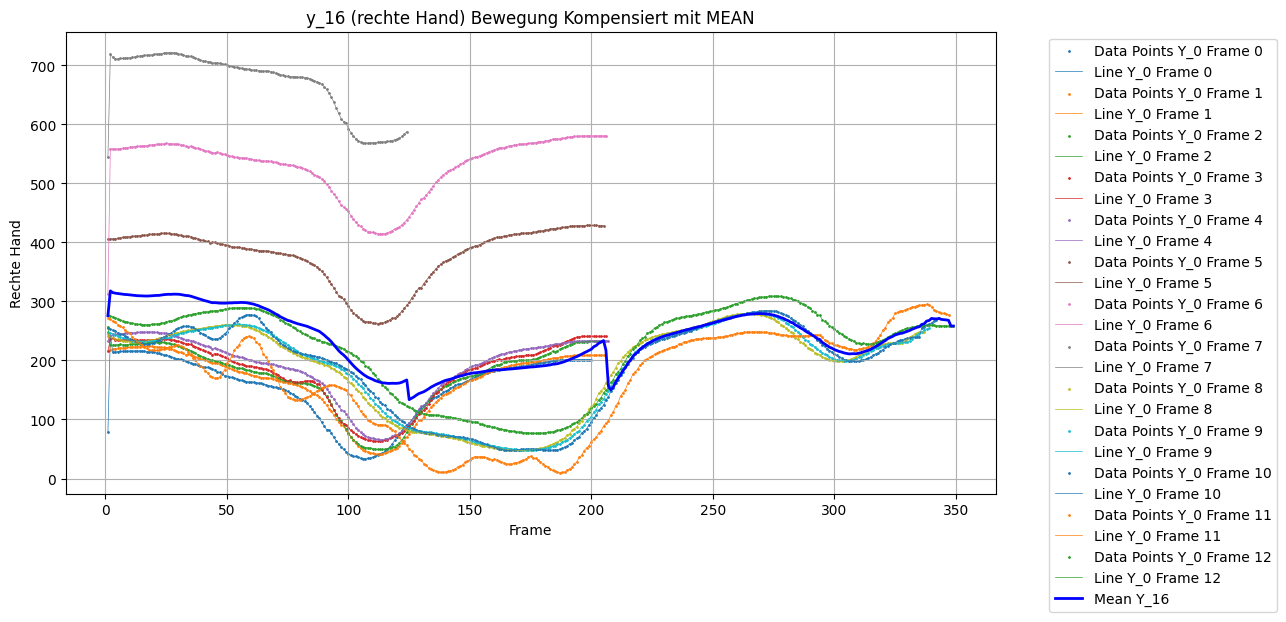

In [20]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

# Plot each DataFrame in dfs
for i, df in enumerate(dfsKomp01):

    # Plot the values of "y_0" against "frame" as dots
    plt.scatter(df["frame"], df["y_16"], marker='o', color=f'C{i}', label=f'Data Points Y_0 Frame {i}', s=1)
    # Plot the line connecting the data points
    plt.plot(df["frame"], df["y_16"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Line Y_0 Frame {i}')

# Plot the mean values per frame
plt.plot(mean_values_01.index, mean_values_01["y_16"], color='b', linestyle='-', linewidth=2, label='Mean Y_16')

plt.title("y_16 (rechte Hand) Bewegung Kompensiert mit MEAN")
plt.xlabel("Frame")
plt.ylabel("Rechte Hand")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Berechnung Euclidean Distances

## Analyse der Kompensierten und nicht Komptensierten Mean Werte

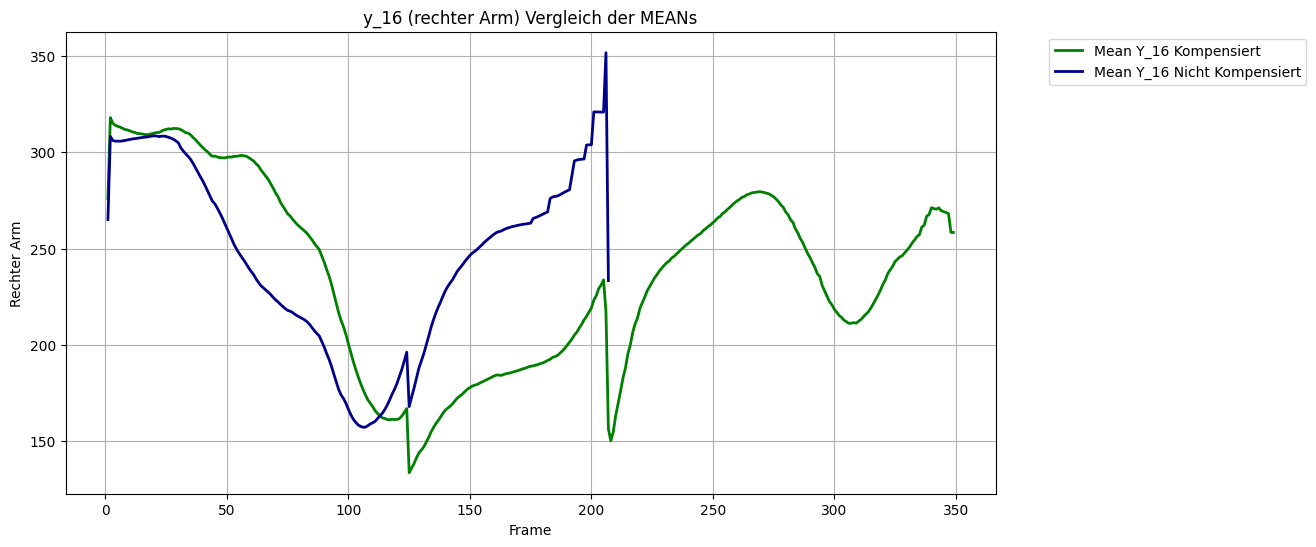

In [21]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

plt.plot(mean_values_01.index, mean_values_01["y_16"], color='green', linestyle='-', linewidth=2, label='Mean Y_16 Kompensiert')
plt.plot(mean_values_03.index, mean_values_03["y_16"], color='darkblue', linestyle='-', linewidth=2, label='Mean Y_16 Nicht Kompensiert')

plt.title("y_16 (rechter Arm) Vergleich der MEANs")
plt.xlabel("Frame")
plt.ylabel("Rechter Arm")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Euclidean Distances

In [22]:
# Define the columns for which you want to calculate the Euclidean distances
columns = ['frame', 'x_0', 'y_0', 'z_0', 'x_11', 'y_11', 'z_11',
           'x_12', 'y_12', 'z_12', 'x_13', 'y_13', 'z_13', 'x_14', 'y_14', 'z_14', 'x_15', 'y_15', 'z_15',
           'x_16', 'y_16', 'z_16', 'x_17', 'y_17', 'z_17', 'x_18', 'y_18', 'z_18', 'x_19', 'y_19', 'z_19',
           'x_20', 'y_20', 'z_20', 'x_21', 'y_21', 'z_21', 'x_22', 'y_22', 'z_22', 'x_23', 'y_23', 'z_23',
           'x_24', 'y_24', 'z_24', 'x_25', 'y_25', 'z_25', 'x_26', 'y_26', 'z_26', 'x_27', 'y_27', 'z_27',
           'x_28', 'y_28', 'z_28', 'x_31', 'y_31', 'z_31', 'x_32', 'y_32', 'z_32']

# Calculate the Euclidean distances grouped by 'frame'
euclidean_distances_03 = {}

# Get common frames between mean_values_03 and mean_values_01
common_frames = mean_values_03.index.intersection(mean_values_01.index)

# Iterate over each frame and calculate the Euclidean distance for each column
for frame in common_frames:
    euclidean_distances_03[frame] = []
    for col in columns[1:]:
        point_1 = (frame, mean_values_03.loc[frame, col])
        point_2 = (frame, mean_values_01.loc[frame, col])
        euclidean_distance_03 = distance.euclidean(point_1, point_2)
        euclidean_distances_03[frame].append(euclidean_distance_03)

# Convert the dictionary to a DataFrame
euclidean_df_03 = pd.DataFrame.from_dict(euclidean_distances_03, orient='index', columns=columns[1:])

print(euclidean_df_03)

            x_0        y_0         z_0        x_11       y_11        z_11   
1     56.347077   3.709900   26.493928   61.694015   0.853769   31.509481  \
2     55.641238   4.177262   28.114948   61.163600   1.457569   32.761196   
3     55.079692   4.217546   29.747885   60.736092   1.626208   34.037398   
4     54.195238   3.875785   31.520561   60.052254   1.431562   35.427136   
5     53.443262   3.449185   33.546902   59.460269   1.182000   36.979316   
..          ...        ...         ...         ...        ...         ...   
203   95.476361  32.498391  185.199457   91.800933  35.448820  181.955717   
204   96.310297  31.769424  186.886446   92.623803  35.107374  183.290456   
205   97.391703  30.750989  188.758103   93.684797  34.618211  184.678227   
206  149.067783  59.904275  300.956471  143.367363  65.875425  295.128101   
207  200.074183  16.334017  462.786914  192.158200   7.468283  453.374459   

           x_12       y_12        z_12        x_13  ...        z_27   
1   

### Rechte Hand

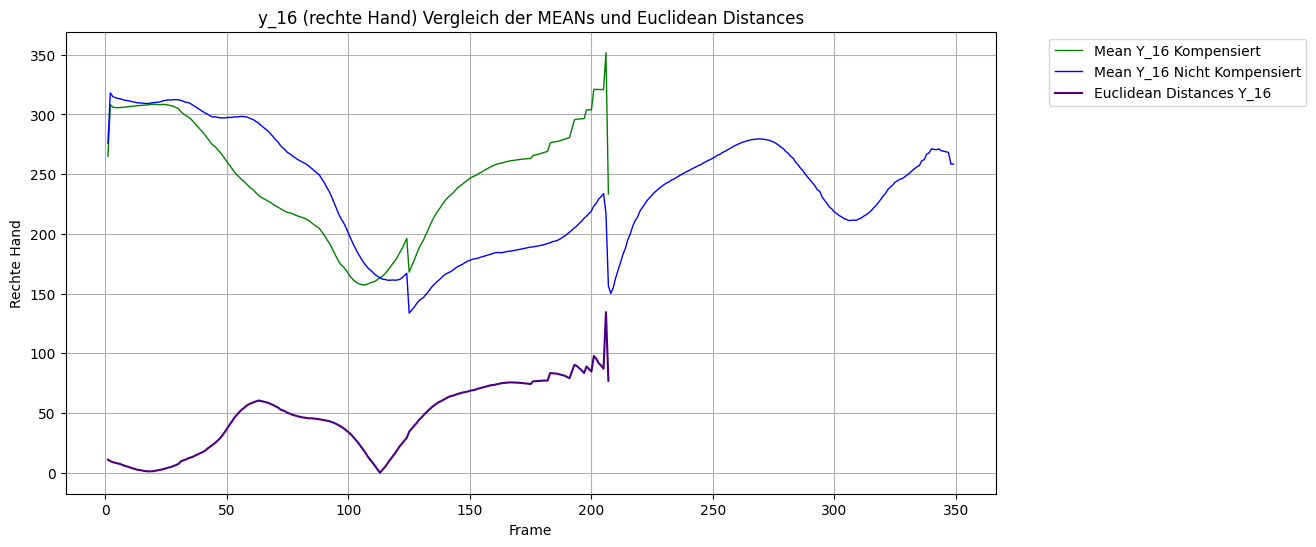

In [23]:
plt.figure(figsize=(12, 6))

# Plot the mean values for DeepMotion 01
plt.plot(mean_values_03.index, mean_values_03["y_16"], color='green', linestyle='-', linewidth=1, label='Mean Y_16 Kompensiert')

# Plot the mean values for Mediapipe 01
plt.plot(mean_values_01.index, mean_values_01["y_16"], color='blue', linestyle='-', linewidth=1, label='Mean Y_16 Nicht Kompensiert')

# Plot the Euclidean distances for the last calculated column
plt.plot(euclidean_df_03.index, euclidean_df_03["y_16"], color='indigo', linestyle='-', linewidth=1.5, label='Euclidean Distances Y_16')


plt.title("y_16 (rechte Hand) Vergleich der MEANs und Euclidean Distances")
plt.xlabel("Frame")
plt.ylabel("Rechte Hand")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Linke Hand

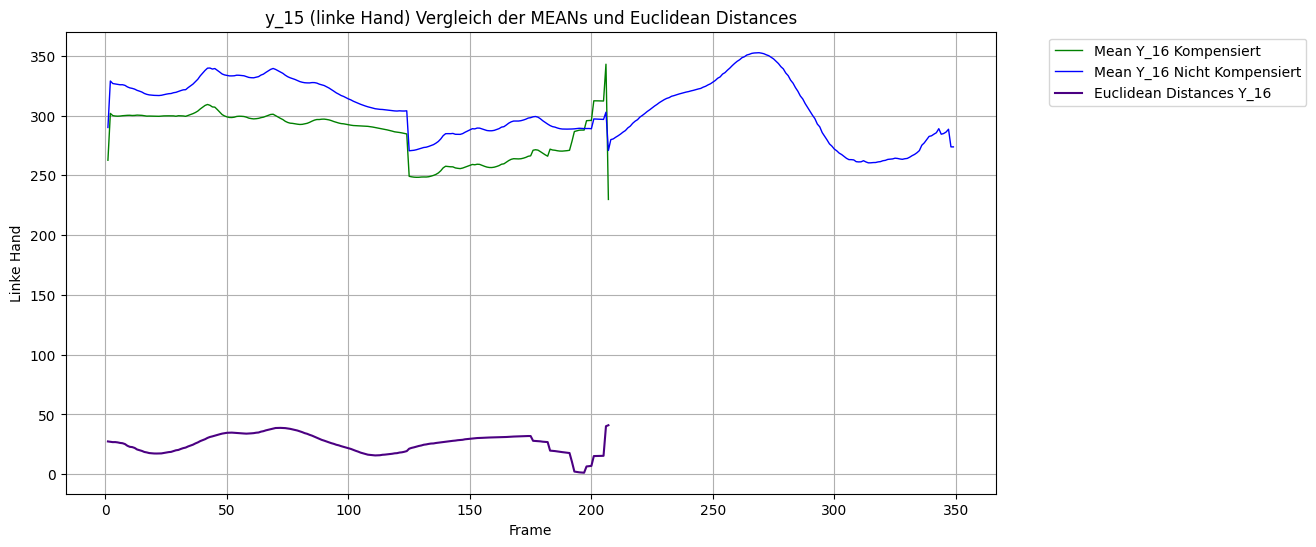

In [24]:
plt.figure(figsize=(12, 6))

# Plot the mean values for DeepMotion 01
plt.plot(mean_values_03.index, mean_values_03["y_15"], color='green', linestyle='-', linewidth=1, label='Mean Y_16 Kompensiert')

# Plot the mean values for Mediapipe 01
plt.plot(mean_values_01.index, mean_values_01["y_15"], color='blue', linestyle='-', linewidth=1, label='Mean Y_16 Nicht Kompensiert')

# Plot the Euclidean distances for the last calculated column
plt.plot(euclidean_df_03.index, euclidean_df_03["y_15"], color='indigo', linestyle='-', linewidth=1.5, label='Euclidean Distances Y_16')


plt.title("y_15 (linke Hand) Vergleich der MEANs und Euclidean Distances")
plt.xlabel("Frame")
plt.ylabel("Linke Hand")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Linker Ellbogen

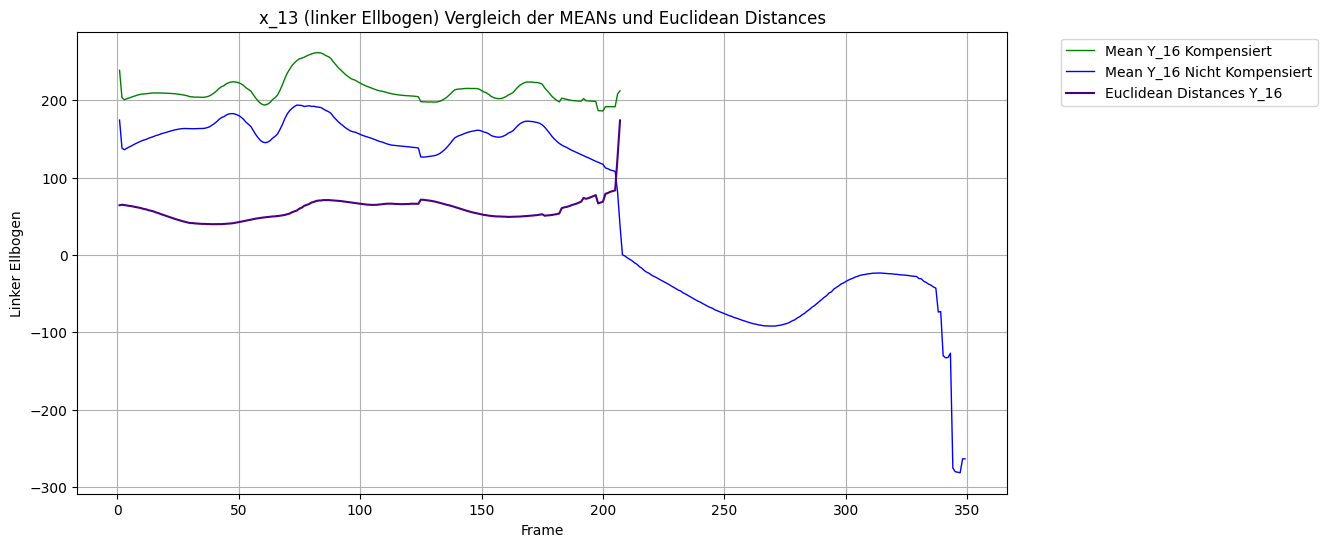

In [25]:
plt.figure(figsize=(12, 6))

# Plot the mean values for DeepMotion 01
plt.plot(mean_values_03.index, mean_values_03["x_13"], color='green', linestyle='-', linewidth=1, label='Mean Y_16 Kompensiert')

# Plot the mean values for Mediapipe 01
plt.plot(mean_values_01.index, mean_values_01["x_13"], color='blue', linestyle='-', linewidth=1, label='Mean Y_16 Nicht Kompensiert')

# Plot the Euclidean distances for the last calculated column
plt.plot(euclidean_df_03.index, euclidean_df_03["x_13"], color='indigo', linestyle='-', linewidth=1.5, label='Euclidean Distances Y_16')


plt.title("x_13 (linker Ellbogen) Vergleich der MEANs und Euclidean Distances")
plt.xlabel("Frame")
plt.ylabel("Linker Ellbogen")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

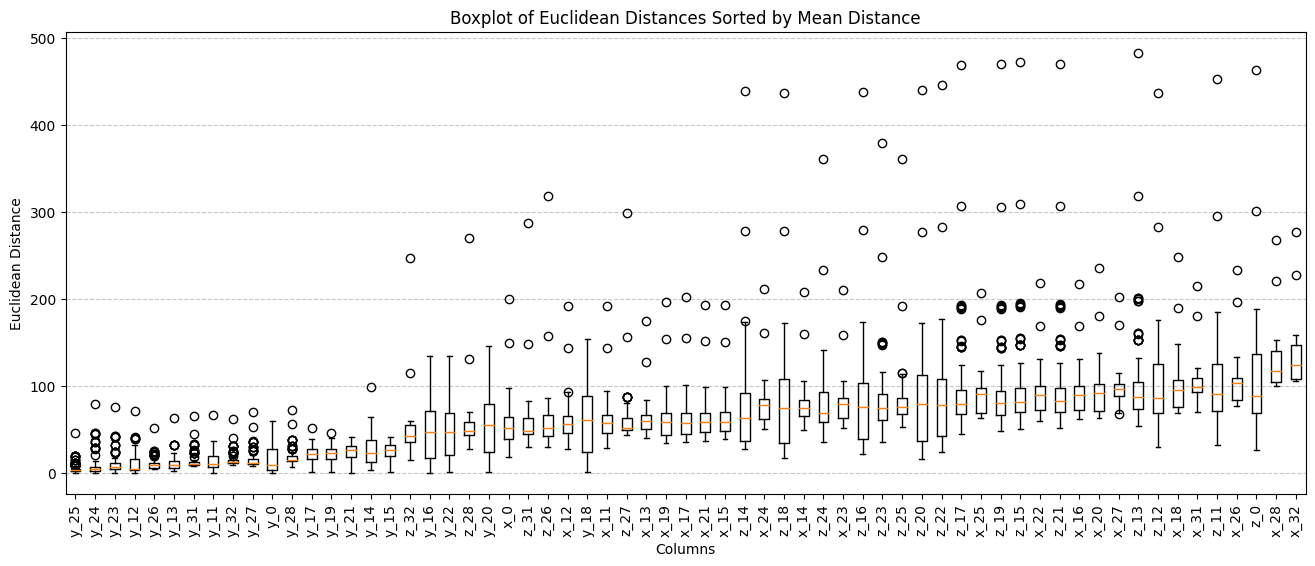

In [26]:
# Calculate the mean of Euclidean distances for each column
mean_distances = euclidean_df_03.mean()

# Sort the DataFrame by the mean distance in ascending order
sorted_df = euclidean_df_03[mean_distances.sort_values().index]

# Plotting the box plot
plt.figure(figsize=(16, 6))
plt.boxplot(sorted_df.values)
plt.xticks(range(1, len(sorted_df.columns) + 1), sorted_df.columns, rotation=90)
plt.title('Boxplot of Euclidean Distances Sorted by Mean Distance')
plt.xlabel('Columns')
plt.ylabel('Euclidean Distance')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Ohne Z Werte

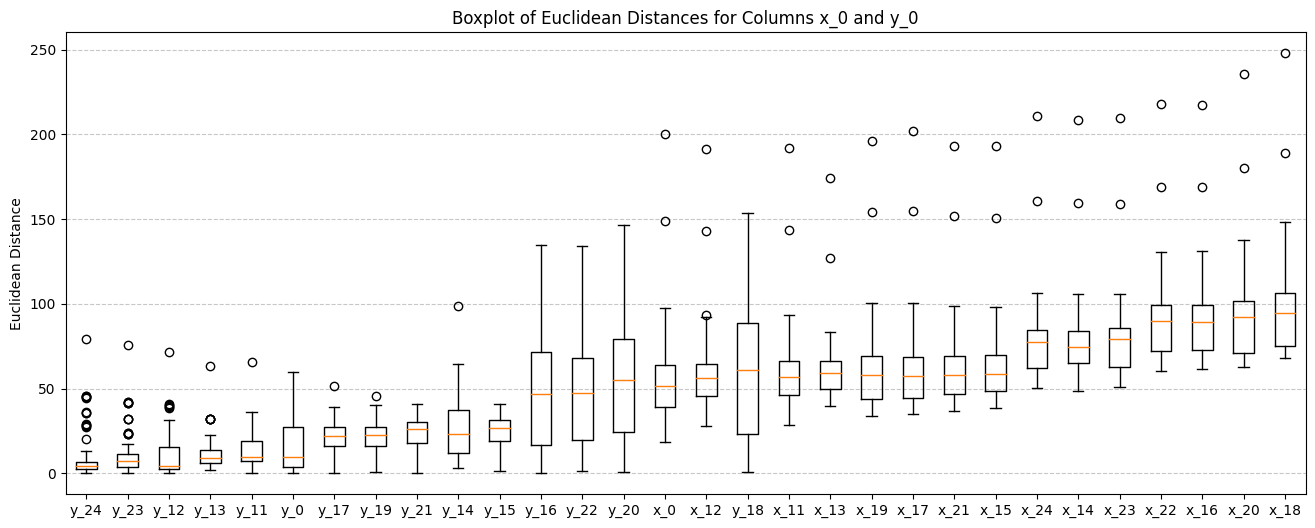

In [27]:
# Select only the 'x_0' and 'y_0' columns from the sorted DataFrame
selected_columns = ['x_0', 'x_11', 'x_12', 'x_13', 
                    'x_14', 'x_15', 'x_16', 'x_17', 
                    'x_18', 'x_19', 'x_20', 'x_21', 
                    'x_22', 'x_23', 'x_24', 'y_0', 
                    'y_11', 'y_12', 'y_13', 
                    'y_14', 'y_15', 'y_16', 'y_17', 
                    'y_18', 'y_19', 'y_20', 'y_21', 
                    'y_22', 'y_23', 'y_24']

# Calculate the mean of Euclidean distances for each column
mean_distances = euclidean_df_03[selected_columns].mean()

# Sort the DataFrame by the mean distance in ascending order
sorted_df = euclidean_df_03[mean_distances.sort_values().index]

# Plotting the box plot
plt.figure(figsize=(16, 6))
plt.boxplot(sorted_df.values)
plt.xticks(range(1, len(sorted_df.columns) + 1), sorted_df.columns)
plt.title('Boxplot of Euclidean Distances for Columns x_0 and y_0')
plt.ylabel('Euclidean Distance')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Vergleich ganzer Oberkörper

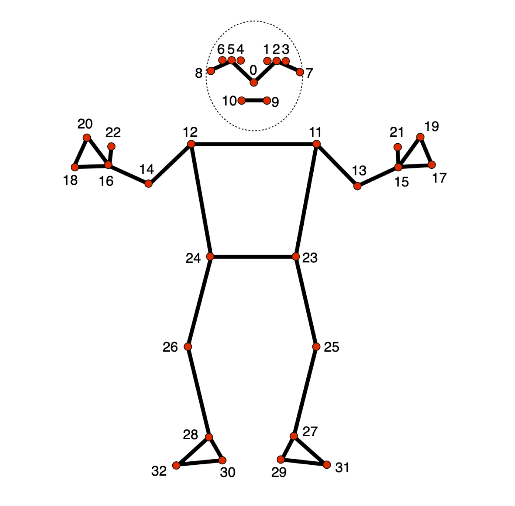

In [28]:
# Inserting an image
img = plt.imread('Pictures/landmark.png')  # Replace 'landmark.png' with the path to your image
im = OffsetImage(img, zoom=0.2)  # Adjust the zoom level as needed
ab = AnnotationBbox(im, (0.5, 0.5), frameon=False)
plt.gca().add_artist(ab)

# Remove axis
plt.axis('off')

plt.show()

# Difference in Mean Upper Body

In [29]:
selected_columns = ['x_0', 'y_0', 'z_0', 'x_11', 'y_11', 'z_11',
                    'x_12', 'y_12', 'z_12', 'x_13', 'y_13', 'z_13', 
                    'x_14', 'y_14', 'z_14', 'x_15', 'y_15', 'z_15',
                    'x_16', 'y_16', 'z_16', 'x_17', 'y_17', 'z_17', 
                    'x_18', 'y_18', 'z_18', 'x_19', 'y_19', 'z_19',
                    'x_20', 'y_20', 'z_20', 'x_21', 'y_21', 'z_21', 
                    'x_22', 'y_22', 'z_22', 'x_23', 'y_23', 'z_23',
                    'x_24', 'y_24', 'z_24']

difference_in_mean_upper_body_01 = mean_values_01[selected_columns].mean() - mean_values_03[selected_columns].mean()

print(f"Mean Value: {difference_in_mean_upper_body_01}")

Mean Value: x_0    -147.400673
y_0      -4.531935
z_0     178.774507
x_11   -149.795352
y_11    -11.713364
z_11    171.212613
x_12   -149.280201
y_12    -15.069126
z_12    165.919668
x_13   -147.136210
y_13    -16.865248
z_13    170.188276
x_14   -164.884046
y_14    -32.208482
z_14    119.634339
x_15   -139.602184
y_15     21.121775
z_15    162.195464
x_16   -194.758924
y_16     -9.453361
z_16    141.700297
x_17   -132.880172
y_17     15.957865
z_17    158.530291
x_18   -206.325952
y_18     -8.033598
z_18    143.186552
x_19   -133.569279
y_19     17.433462
z_19    158.954701
x_20   -201.656343
y_20     -7.284322
z_20    148.614966
x_21   -138.473776
y_21     20.348651
z_21    163.258594
x_22   -195.118314
y_22     -8.354448
z_22    146.409882
x_23   -163.812389
y_23    -20.549169
z_23    133.983561
x_24   -163.654302
y_24    -24.459143
z_24    127.893144
dtype: float64


In [30]:
selected_columns_X = ['x_0', 'x_11', 'x_12', 'x_13', 
                    'x_14', 'x_15', 'x_16', 'x_17', 
                    'x_18', 'x_19', 'x_20', 'x_21', 
                    'x_22', 'x_23', 'x_24']

selected_columns_Y = ['y_0', 'y_11', 'y_12', 'y_13', 
                    'y_14', 'y_15', 'y_16', 'y_17', 
                    'y_18', 'y_19', 'y_20', 'y_21', 
                    'y_22', 'y_23', 'y_24']

selected_columns_Z = ['z_0', 'z_11', 'z_12', 'z_13', 
                    'z_14', 'z_15', 'z_16', 'z_17', 
                    'z_18', 'z_19', 'z_20', 'z_21', 
                    'z_22', 'z_23', 'z_24']

difference_in_mean_upper_body_01_X = difference_in_mean_upper_body_01[selected_columns_X]
difference_in_mean_upper_body_01_Y = difference_in_mean_upper_body_01[selected_columns_Y]
difference_in_mean_upper_body_01_Z = difference_in_mean_upper_body_01[selected_columns_Z]

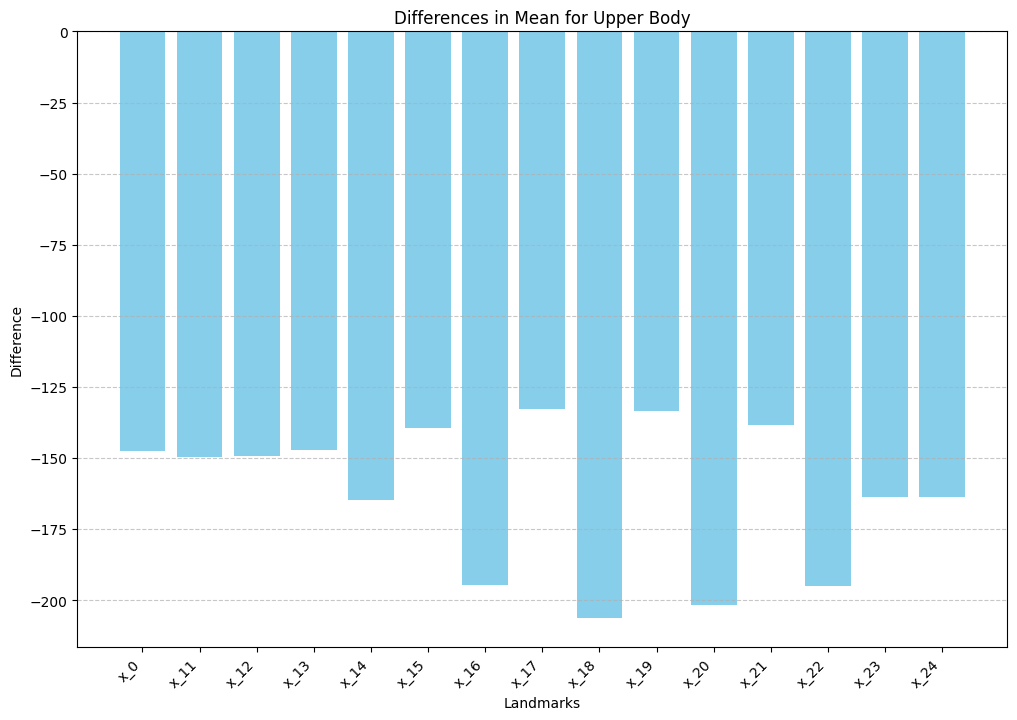

In [31]:
# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(difference_in_mean_upper_body_01_X.index, difference_in_mean_upper_body_01_X, color='skyblue')
plt.title('Differences in Mean for Upper Body')
plt.xlabel('Landmarks')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


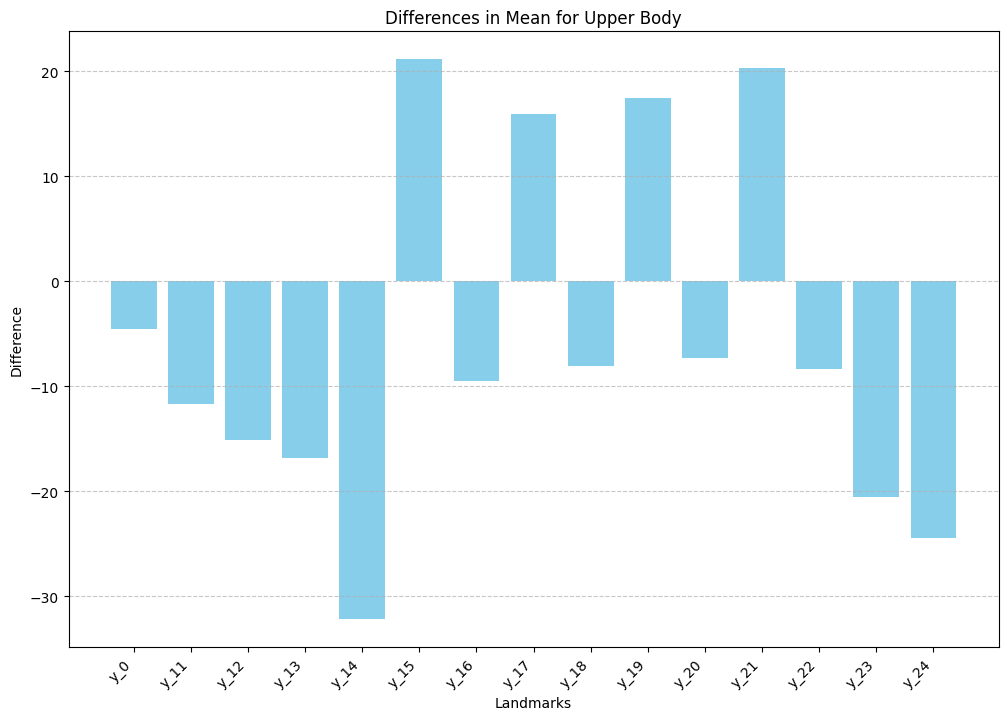

In [32]:
# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(difference_in_mean_upper_body_01_Y.index, difference_in_mean_upper_body_01_Y, color='skyblue')
plt.title('Differences in Mean for Upper Body')
plt.xlabel('Landmarks')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

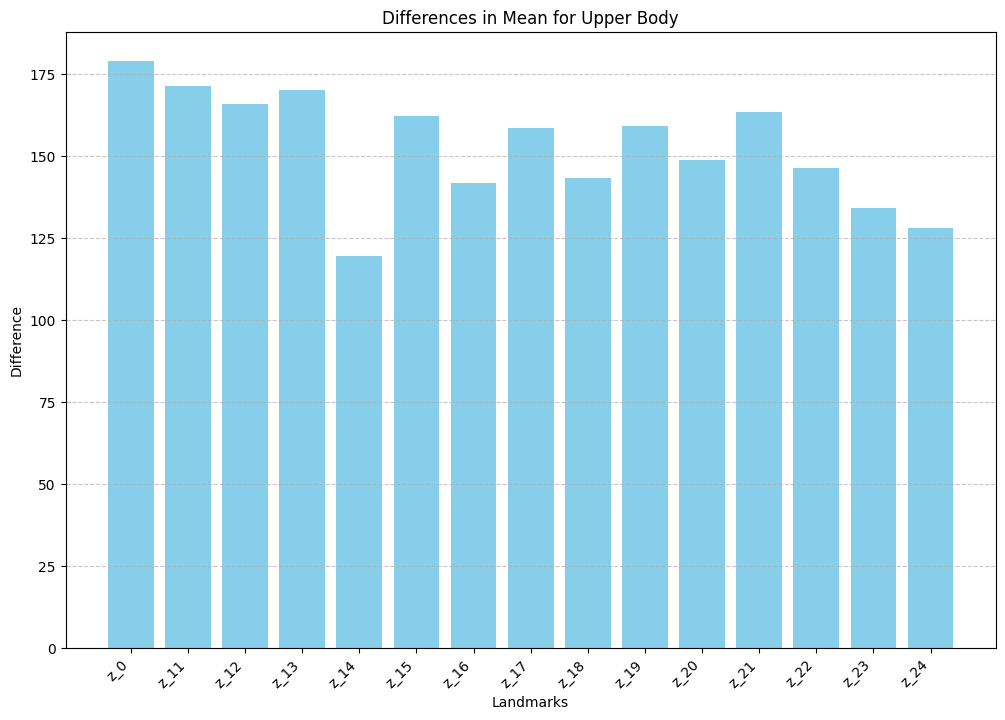

In [33]:
# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(difference_in_mean_upper_body_01_Z.index, difference_in_mean_upper_body_01_Z, color='skyblue')
plt.title('Differences in Mean for Upper Body')
plt.xlabel('Landmarks')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()